Import all depencies

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.linear_model
import sklearn.cluster
import sklearn.decomposition

read and clean data

In [22]:
data_frame = pd.read_csv("../data/raw/ESA.tsv", delimiter='\t')
data_frame = data_frame.dropna(axis=0, how='any')
data_frame.head()

,Date,AA,AB,AC,AD,AE,AF,AG,AH,AI,...,BB,BC,BD,BE,BF,BG,BH,BI,BJ,BK
117,T1/2000,36.7,574.1,259.0,299.6,12.4,187.2,81.2,359.0,503.7,...,199.5,1413.5,248.2,239.2,368.5,647.1,241.2,488.6,376.4,589.0
118,T2/2000,36.6,578.2,256.4,300.7,12.8,186.2,82.1,361.8,507.1,...,202.9,1457.1,247.9,240.0,373.2,655.4,241.5,487.0,377.4,620.6
119,T3/2000,36.5,580.1,253.9,301.4,12.9,185.2,82.8,364.6,515.0,...,206.9,1483.1,247.9,240.5,377.2,662.8,238.7,487.5,378.5,632.9
120,T4/2000,36.3,582.0,251.4,302.6,13.0,185.0,83.7,368.0,519.8,...,210.0,1475.9,247.6,242.3,379.8,667.8,247.8,493.8,379.7,614.5
121,T1/2001,36.1,582.1,249.9,302.0,12.8,184.8,85.1,368.8,523.7,...,211.9,1511.3,247.3,242.8,382.8,672.4,246.8,494.1,381.1,636.0


sum all sectors

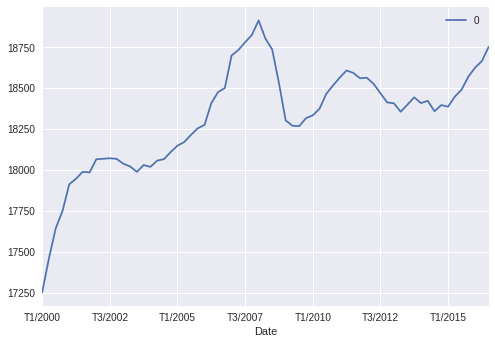

In [23]:
s = data_frame.copy().drop("Date", axis=1).sum(axis=1)
plt.figure()
d = pd.concat([s, data_frame[["Date"]]], axis=1)
d.plot(x="Date")
plt.show()

extract 4 ranges and and compute sum of them

In [24]:
d1 = pd.DataFrame(data_frame.head(16).sum(axis=0)).transpose()
d2 = pd.DataFrame(data_frame.iloc[48:64].sum(axis=0)).transpose()
d3 = pd.DataFrame(data_frame.iloc[16:32].sum(axis=0)).transpose()
d4 = pd.DataFrame(data_frame.iloc[32:48].sum(axis=0)).transpose()
data = pd.concat([d1, d3, d4, d2]).reset_index(drop=True)
data = data.drop("Date", axis=1)
data.head()

,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,...,BB,BC,BD,BE,BF,BG,BH,BI,BJ,BK
0,560.5,9366,3747.3,4709.5,206.8,2932.8,1392.7,5816.7,8188.1,2960.4,...,3385.4,23806.6,3956.9,3984.3,6294.7,11057.9,3935.9,8010.5,6237.5,9377.3
1,455.9,9200.2,2684.5,4153.3,211.5,2677.4,1432,5465.6,7425.3,2636.1,...,3542.7,25592.3,3757.8,4340.6,7070.4,12414.5,3913.3,8213.3,7213.5,9803.4
2,404.6,8869.4,1998.9,3566.1,185.2,2364.5,1362.2,4904.9,6701.1,2333.5,...,3374.9,25772.4,3710.7,4713,7635.1,13903.1,4268.7,8665.5,7881.5,8845.7
3,361.3,8785.9,1716.8,3100.2,157.8,2257.8,1284.4,4430.2,6269.9,2183,...,3300.9,26148,3533.5,4925.6,7988.6,15151.4,4445.2,8821.4,7248.4,8573.8


## jobs by sectors

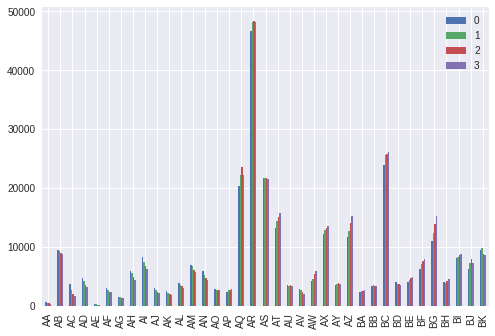

In [25]:
plt.figure(figsize=(40, 20))
d = data.copy().transpose()
d.plot.bar()
plt.show()

## Percentage of jobs by sectors

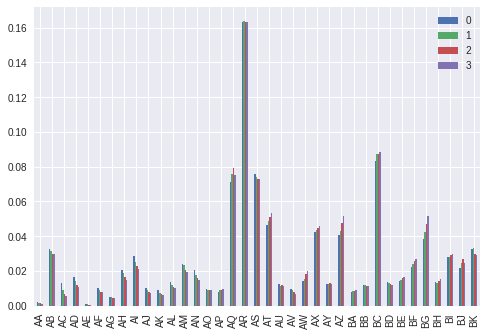

In [26]:
n_data = d / d.sum()
plt.figure(figsize=(40, 40))
n_data.plot.bar()
plt.show()

# Correlation of all sectors

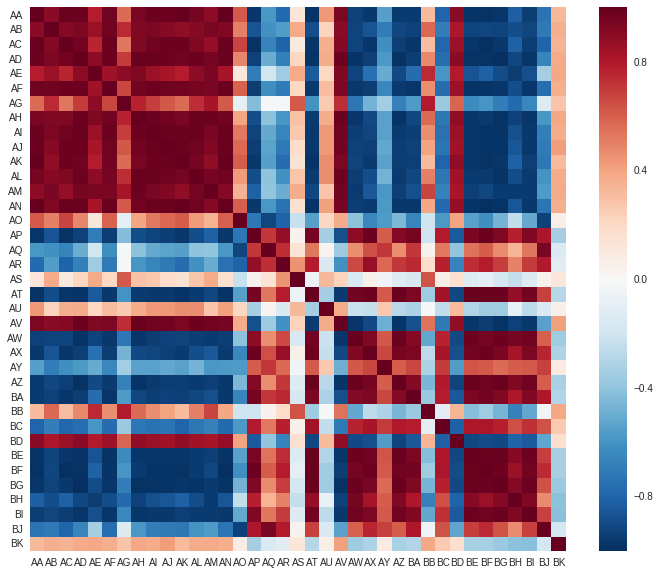

In [27]:
corr = data_frame.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

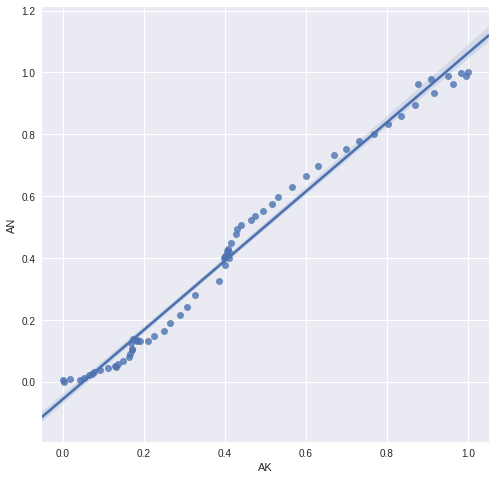

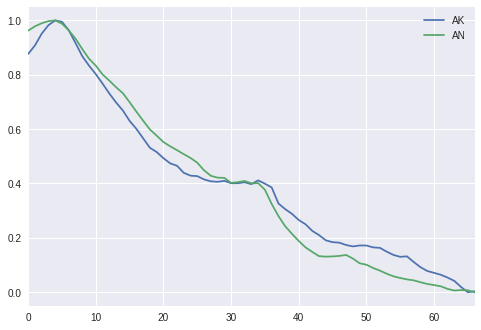

In [28]:
d_c = data_frame.copy().reset_index(drop=True)
tmp = d_c[["AK", "AN"]]
tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
plt.figure(figsize=(8, 8))
ax = sns.regplot(x="AK", y="AN", data=tmp)
plt.show()
plt.figure(figsize=(40, 40))
tmp.plot.line()
plt.show()

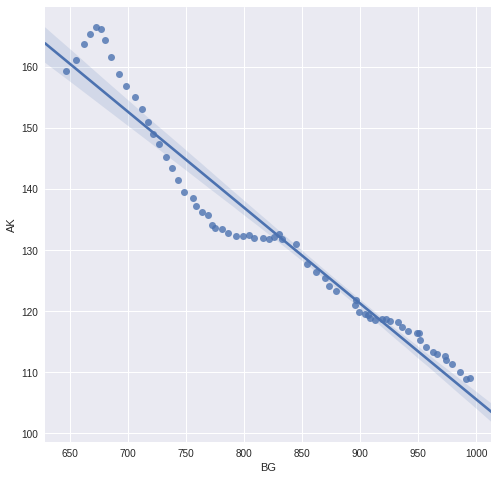

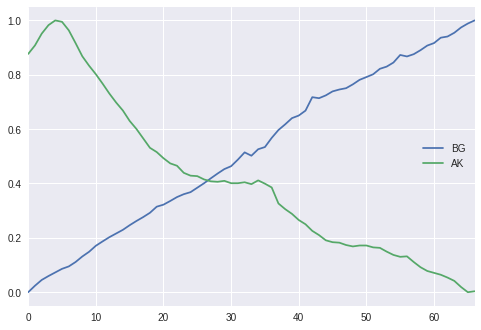

In [29]:
plt.figure(figsize=(8, 8))
ax = sns.regplot(x="BG", y="AK", data=d_c)
plt.show()
plt.figure(figsize=(40, 40))
tmp = d_c[["BG", "AK"]]
tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
tmp.plot.line()
plt.show()

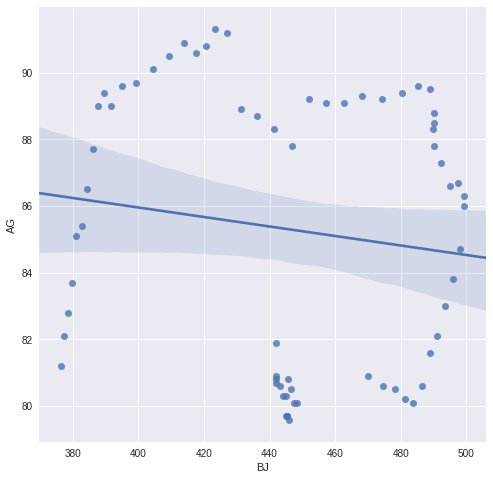

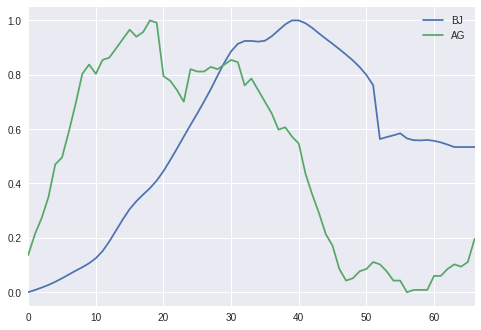

In [30]:
plt.figure(figsize=(8, 8))
ax = sns.regplot(x="BJ", y="AG", data=d_c)
plt.show()
plt.figure(figsize=(40, 40))
tmp = d_c[["BJ", "AG"]]
tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
tmp.plot.line()
plt.show()

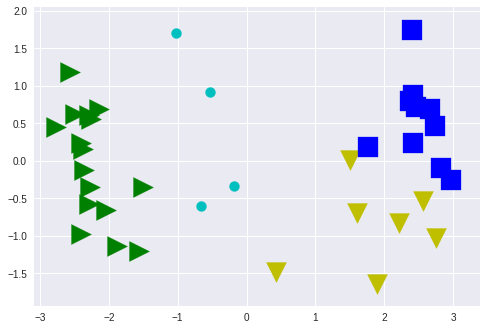

In [50]:
s_data = data_frame.copy().drop("Date", axis=1)
s_data = (s_data - s_data.min()) / (s_data.max() - s_data.min())
s_data = s_data.transpose()
reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=0).fit(reduced_data)
plot = [".", ",", ">", "v", "^", "<", "s", "8"]
color = ["c", "b", "g", "y", "m", "k"]
for i in range(0, reduced_data.shape[0]):
    plt.scatter(reduced_data[i,0], reduced_data[i,1], c=color[kmeans.labels_[i]],
                marker=plot[kmeans.labels_[i]], s=400)
plt.show()

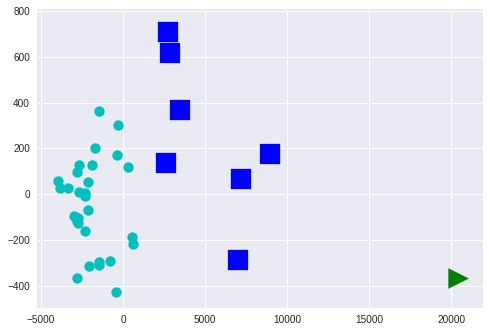

In [53]:
s_data = data_frame.copy().drop("Date", axis=1)
s_data = s_data.transpose()
reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(reduced_data)
plot = [".", ",", ">", "v", "^", "<", "s", "8"]
color = ["c", "b", "g", "y", "m", "k"]
for i in range(0, reduced_data.shape[0]):
    plt.scatter(reduced_data[i,0], reduced_data[i,1], c=color[kmeans.labels_[i]],
                marker=plot[kmeans.labels_[i]], s=400)
plt.show()